In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from os.path import join
from sklearn.neighbors import (KNeighborsRegressor,
                               KNeighborsClassifier)
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_error,
                             accuracy_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,
                                   OneHotEncoder,
                                   LabelEncoder)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from PIL import Image

Estimator:

* fit
* predict
* predict_proba (классификаторов)

Transformer:

* fit
* transform
* fit_transform

## Regression

In [5]:
DATA_PATH = "."
SEED = 111
np.random.seed(SEED)

In [6]:
data = pd.read_csv(join(DATA_PATH, "WorldHappiness_Corruption_2015_2020.csv"))
data.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [8]:
X = data[["government_trust", "cpi_score"]]

In [9]:
X.std()

government_trust     0.109032
cpi_score           19.508833
dtype: float64

In [11]:
X.head()

,government_trust,cpi_score
0,0.315964,88
1,0.400770,91
2,0.153527,79
3,0.367007,86
4,0.382612,90


## StandardScaler

In [10]:
scaler = StandardScaler()

In [12]:
scaler.fit(X)

StandardScaler()

In [14]:
scaler.mean_, scaler.scale_

(array([ 0.12571952, 44.3270202 ]), array([ 0.10896321, 19.49651295]))

In [15]:
scaler.transform(X)

array([[ 1.74594999,  2.24004056],
       [ 2.52425152,  2.39391423],
       [ 0.25519659,  1.77841955],
       ...,
       [ 3.30224262,  0.49613897],
       [-0.41106481, -1.04259773],
       [-1.14252999, -1.29905385]])

In [17]:
scaler = StandardScaler()

In [19]:
#scaler.transform(X)

## OneHotEncoder

In [20]:
X = data[["continent"]]
X.head()

,continent
0,Europe
1,Europe
2,Europe
3,Europe
4,Europe


In [21]:
X["continent"].unique()

array(['Europe', 'North America', 'Australia', 'Asia', 'South America',
       'Africa'], dtype=object)

In [22]:
ohe = OneHotEncoder(sparse=False)

In [23]:
ohe.fit(X)

OneHotEncoder(sparse=False)

In [24]:
ohe.transform(X)

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [25]:
ohe.categories_

[array(['Africa', 'Asia', 'Australia', 'Europe', 'North America',
        'South America'], dtype=object)]

In [26]:
ohe = OneHotEncoder(sparse=False, drop="first")

In [27]:
ohe.fit(X)

OneHotEncoder(drop='first', sparse=False)

In [28]:
ohe.transform(X)

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

## LabelEncoder

In [29]:
colors = np.array(["red", "blue", "green", "red", "pink", "blabla", "tratra"])
colors

array(['red', 'blue', 'green', 'red', 'pink', 'blabla', 'tratra'],
      dtype='<U6')

In [30]:
le = LabelEncoder()
le.fit(colors)

LabelEncoder()

In [31]:
le.transform(colors)

array([4, 1, 2, 4, 3, 0, 5])

## Work with data

In [32]:
data.columns

Index(['Country', 'happiness_score', 'gdp_per_capita', 'family', 'health',
       'freedom', 'generosity', 'government_trust', 'dystopia_residual',
       'continent', 'Year', 'social_support', 'cpi_score'],
      dtype='object')

In [33]:
data.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [34]:
data["happiness_score"].nunique()

747

In [35]:
cat_cols = ["Country", "continent"]
num_cols = ["gdp_per_capita",	"family",
            "health",	"freedom",	"generosity",
            "government_trust",	"dystopia_residual",
            "Year",	"social_support",	"cpi_score"]
all_features = cat_cols + num_cols

target = data["happiness_score"].values

In [36]:
X = data[all_features]
y = target

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.15,
                                                    random_state=SEED)

In [38]:
preprocessor = ColumnTransformer(transformers=[
    ("scaler", StandardScaler(), num_cols),
    ("ohe", OneHotEncoder(drop="first"), cat_cols)
])

In [39]:
preprocessor

ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 ['gdp_per_capita', 'family', 'health',
                                  'freedom', 'generosity', 'government_trust',
                                  'dystopia_residual', 'Year', 'social_support',
                                  'cpi_score']),
                                ('ohe', OneHotEncoder(drop='first'),
                                 ['Country', 'continent'])])

In [43]:
preprocessor.transformers[0][1]

StandardScaler()

In [44]:
knn = KNeighborsRegressor(n_neighbors=1)

In [45]:
knn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", KNeighborsRegressor(n_neighbors=8, n_jobs=8))
])

In [46]:
knn_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['gdp_per_capita', 'family',
                                                   'health', 'freedom',
                                                   'generosity',
                                                   'government_trust',
                                                   'dystopia_residual', 'Year',
                                                   'social_support',
                                                   'cpi_score']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['Country', 'continent'])])),
                ('knn', KNeighborsRegressor(n_jobs=8, n_neighbors=8))])

In [47]:
knn_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['gdp_per_capita', 'family',
                                                   'health', 'freedom',
                                                   'generosity',
                                                   'government_trust',
                                                   'dystopia_residual', 'Year',
                                                   'social_support',
                                                   'cpi_score']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['Country', 'continent'])])),
                ('knn', KNeighborsRegressor(n_jobs=8, n_neighbors=8))])

In [49]:
knn_pipeline.predict(X)[:10]

array([7.31874998, 7.46487497, 7.10825006, 7.33774996, 7.40374995,
       7.09262509, 7.25375003, 7.32149998, 7.392875  , 7.19400004])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.15,
                                                    random_state=SEED)

In [53]:
k_neighbors = [1, 2, 3, 5, 7, 10]
r2_scores = []
mse_scores = []

for k in k_neighbors:
    knn_pipeline = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("knn", KNeighborsRegressor(n_neighbors=k, n_jobs=8))
        ])
    knn_pipeline.fit(X_train, y_train)
    y_test_pred = knn_pipeline.predict(X_test)
    r2 = r2_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    
    r2_scores += [r2]
    mse_scores += [mse]
    
    print(k, r2, mse)

1 0.9016263201941989 0.11642944911889179
2 0.9217602000110323 0.09260014294342377
3 0.9216167217996469 0.09276995553094866
5 0.8978481879054924 0.12090102995169963
7 0.891164228620634 0.1288117810693301
10 0.8880385842110294 0.13251111464585388


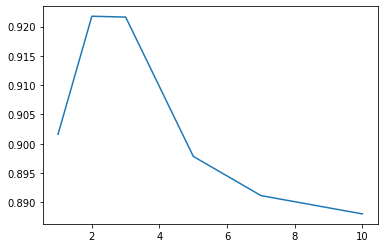

In [54]:
sns.lineplot(x=k_neighbors, y=r2_scores);

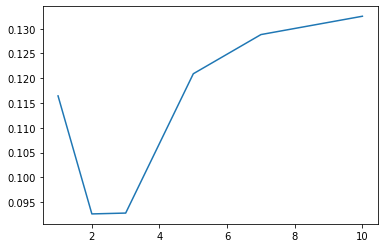

In [55]:
sns.lineplot(x=k_neighbors, y=mse_scores);

## Classification

#### Pikachu vs not Pikachu

[data](https://www.kaggle.com/datasets/hal0samuel/pikachu-classification-dataset)

In [56]:
PIKA_FOLDER = "pikachu_dataset"

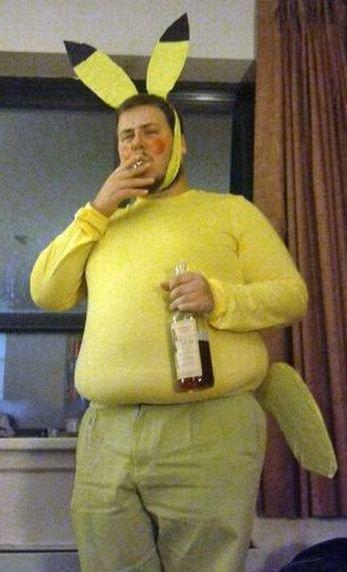

In [57]:
img = Image.open(join(PIKA_FOLDER, "train", "not_pikachu", "not_pikachu_00038.jpg"))
img

In [58]:
labels = ["pikachu", "not_pikachu"]
modes = ["train", "validation", "test"]
pika_mats = {}
img_size = 128
num_features = 3 * img_size * img_size

for label in labels:
    n_samples = len(os.listdir(join(PIKA_FOLDER, modes[0], label))) + \
                len(os.listdir(join(PIKA_FOLDER, modes[1], label))) + \
                len(os.listdir(join(PIKA_FOLDER, modes[2], label)))
    
    X = np.zeros((n_samples, num_features))
    i = 0
    for mode in modes:
        for img in os.listdir(join(PIKA_FOLDER, mode, label)):
            image = Image.open(join(PIKA_FOLDER, mode, label, img)).resize((img_size, img_size))
            image = np.array(image).reshape(num_features) # vector
            X[i] += image
            i += 1
            
    pika_mats[label] = X

In [59]:
pika_mats["pikachu"].shape

(645, 49152)

In [60]:
pika_mats["not_pikachu"].shape

(645, 49152)

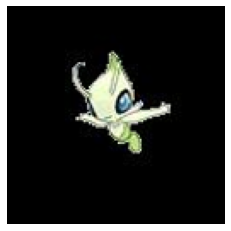

In [61]:
plt.imshow(pika_mats["not_pikachu"][120].astype(int).reshape((img_size, img_size, 3)))
plt.axis("off");

In [62]:
X_merged = np.vstack([pika_mats["pikachu"], pika_mats["not_pikachu"]])
y = np.array([*np.repeat("pikachu", len(pika_mats["pikachu"]))] + \
             [*np.repeat("not_pikachu", len(pika_mats["not_pikachu"]))])
y_numeric = (y == "pikachu").astype(int)

pika_X_train, pika_X_test, pika_y_train, pika_y_test = train_test_split(X_merged,
                                                                        y_numeric,
                                                                        test_size=0.2248,
                                                                        random_state=SEED)

In [63]:
k_neighbors = [1, 3, 5, 7, 11, 15, 25]
accuracy_scores = []

for k in k_neighbors:
    knn_pipeline = Pipeline(steps=[
            ("preprocessor", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=k, n_jobs=8))
        ])
    knn_pipeline.fit(pika_X_train, pika_y_train)
    pika_y_test_pred = knn_pipeline.predict(pika_X_test)
    accuracy = accuracy_score(pika_y_test, pika_y_test_pred)    
    accuracy_scores += [accuracy]

    print(k, accuracy)

1 0.7172413793103448
3 0.7551724137931034
5 0.7586206896551724
7 0.7655172413793103
11 0.7931034482758621
15 0.7793103448275862
25 0.7931034482758621


In [66]:
np.argmax(accuracy_scores)

4

In [67]:
k_neighbors[np.argmax(accuracy_scores)]

11

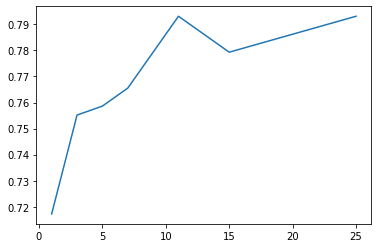

In [65]:
sns.lineplot(x=k_neighbors, y=accuracy_scores);

Best k: 11 / 25 

In [68]:
pika_y_pred_test_probs = knn_pipeline.predict_proba(pika_X_test)

In [70]:
(pika_y_pred_test_probs[:, 1] > 0.5).astype(int)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1])